In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape               # Rows and columns

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.drop(columns=["Cabin"], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
embarked_mode = df.Embarked.mode()[0]

In [18]:
df.Embarked.fillna(embarked_mode, inplace=True)
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [19]:
df.dropna(inplace=True)
df.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Embarked       714
dtype: int64

In [25]:
def encode_embarked(val):
    if val == 'S':
        return 0
    elif val == 'C':
        return 1
    elif val == 'Q':
        return 2
    else:
        return -1  # For missing or unknown

df['Embarked_encoded'] = df['Embarked'].apply(encode_embarked)

In [28]:
df.drop(columns=["Embarked_encoded"], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
dummy = pd.get_dummies(df["Embarked"])
df = pd.concat([df,dummy], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'Q'}>],
       [<AxesSubplot:title={'center':'S'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

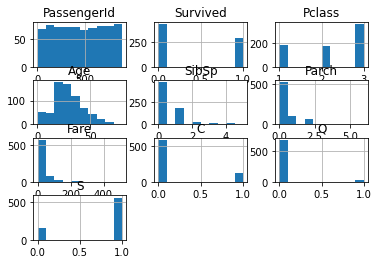

In [30]:
df.hist() # Histogram for all numeric variables of a df

/Users/mahesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

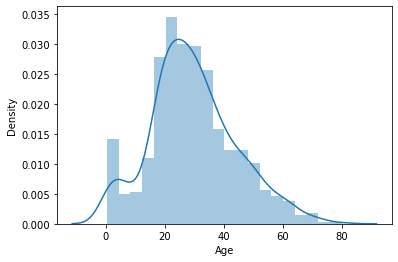

In [31]:
sns.distplot(df['Age']) # Histogram with density line also

<AxesSubplot:xlabel='Fare', ylabel='Density'>

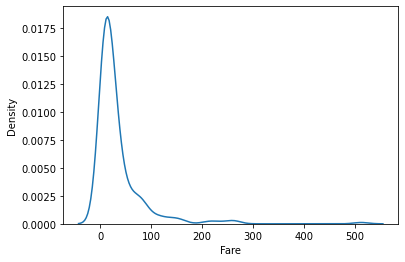

In [32]:

sns.kdeplot(df['Fare']) # Density curve

<AxesSubplot:ylabel='Age'>

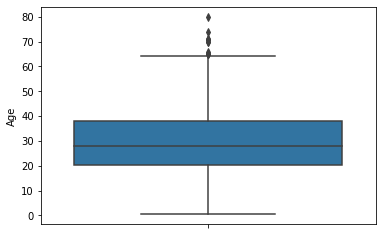

In [34]:
sns.boxplot(y = df['Age']) # boxandwhisker plot

# Questions for EDA

### 1. What is the overall structure of the dataset?
- How many rows and columns are there?
- What are the data types?
- Are there any duplicated rows?


In [38]:
#1a

df.shape

(714, 14)

In [39]:
#1b
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
 11  C            714 non-null    uint8  
 12  Q            714 non-null    uint8  
 13  S            714 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 85.2+ KB


In [40]:
df.duplicated().sum()


0

### 2. Are there any missing values?
- Which columns have missing values?
- What percentage of data is missing in each?


In [46]:
#2a
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
C              0
Q              0
S              0
dtype: int64

### 3. What is the overall survival rate?
- How many passengers survived?
- What percentage of the dataset does that represent?


In [57]:
x = df[df.Survived==1].count()[1]

In [58]:
y = df.shape[0]
(x/y)*100

40.61624649859944

### 4. How does gender affect survival?
- Compare the survival rates of males and females.
- Visualize with a countplot.


In [84]:
#4a
survival_rate = df.groupby("Sex")["Survived"].mean()
difference = df.groupby("Sex")["Survived"].mean()[0] - df.groupby("Sex")["Survived"].mean()[1]
print(f"Women's survival rate is {difference} more than the men")

Women's survival rate is 0.5494912587856182 more than the men


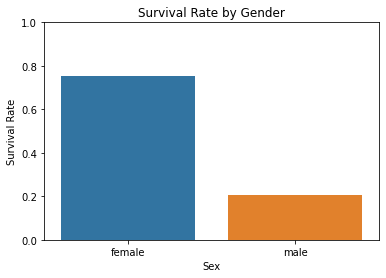

In [85]:
#4b
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


### 5. How does passenger class (Pclass) relate to survival?
- What’s the survival rate for each class?
- Plot survival by Pclass.


In [97]:
#5a
survival_rate = df.groupby("Pclass")["Survived"].mean()
survival_rate

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

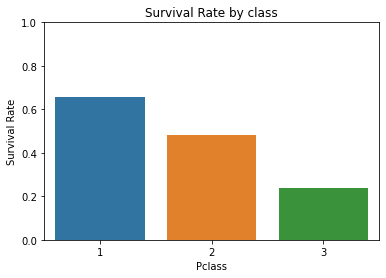

In [98]:
#5b
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### 6. How does age affect survival?
- Are children more likely to survive?
- Plot age distributions for survivors vs non-survivors.


In [145]:
def child_or_nah(age):
    if age < 18:
        return 'Child'
    else:
        return 'Adult'

df["child_or_nah"] = df["Age"].apply(child_or_nah)

survival_rate = df.groupby("child_or_nah")["Survived"].mean()
survival_rate

child_or_nah
Adult    0.381032
Child    0.539823
Name: Survived, dtype: float64

**#6a**

**Child is more likely to survive**

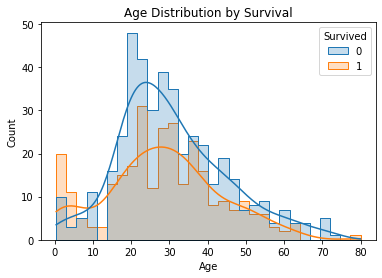

In [149]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element='step')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### 7. Does family size affect survival?
- Create a `FamilySize` column (SibSp + Parch).
- Plot survival rate vs family size.


In [99]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df["FamilySize"]

0      1
1      1
2      0
3      1
4      0
      ..
885    5
886    0
887    0
889    0
890    0
Name: FamilySize, Length: 714, dtype: int64

In [100]:
survival_rate = df.groupby("FamilySize")["Survived"].mean()
survival_rate

FamilySize
0    0.321782
1    0.546763
2    0.569892
3    0.777778
4    0.272727
5    0.136364
6    0.333333
7    0.000000
Name: Survived, dtype: float64

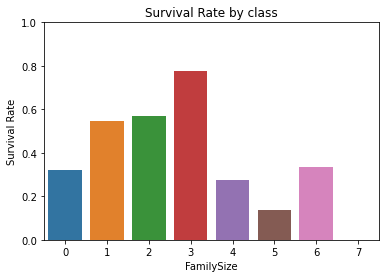

In [101]:
#7b
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### 8. Did passengers traveling alone have different survival rates?
- Create an `IsAlone` column.
- Compare survival for `IsAlone` = 1 vs 0.


In [102]:
df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)
df['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
885    0
886    1
887    1
889    1
890    1
Name: IsAlone, Length: 714, dtype: int64

In [104]:
survival_rate = df.groupby("IsAlone")["Survived"].mean()
survival_rate

IsAlone
0    0.516129
1    0.321782
Name: Survived, dtype: float64

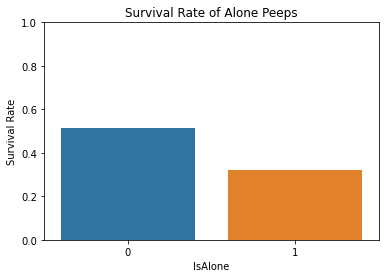

In [105]:
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate of Alone Peeps")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### 9. How does fare relate to survival?
- What is the fare distribution?
- Are higher-paying passengers more likely to survive?


<AxesSubplot:xlabel='Fare', ylabel='Density'>

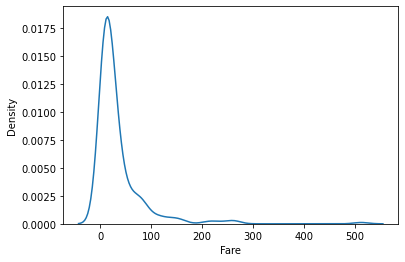

In [107]:
sns.kdeplot(df['Fare'])

In [115]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

def fare_category(fare):
    if fare < q1:
        return 'low'
    elif fare <= q3:
        return 'medium'
    else:
        return 'high'

df["fare_category"] = df["Fare"].apply(fare_category)

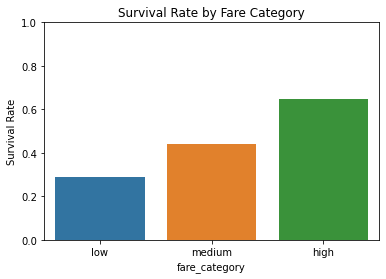

In [119]:
survival_rate = df.groupby('fare_category')['Survived'].mean().reindex(['low', 'medium', 'high'])

sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by Fare Category")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### 10. How does port of embarkation affect survival?
- What are the counts of Embarked values (C, Q, S)?
- What is the survival rate for each port?


In [128]:
df["Embarked"].value_counts()

S    556
C    130
Q     28
Name: Embarked, dtype: int64

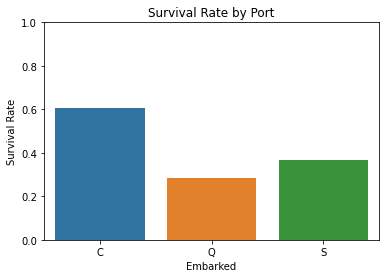

In [129]:
survival_rate = df.groupby("Embarked")["Survived"].mean()
survival_rate
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by Port")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### 11. Are there any useful features we can extract from the Name column?
- Extract titles like Mr, Miss, Mrs, etc.
- Group by title and analyze survival rates.


In [132]:
#11a
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
885     Mrs
886     Rev
887    Miss
889      Mr
890      Mr
Name: Title, Length: 714, dtype: object

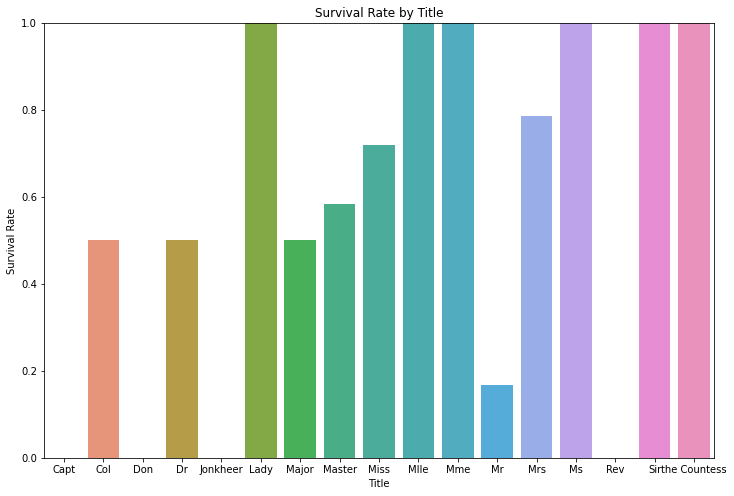

In [140]:
#11b
survival_rate = df.groupby("Title")["Survived"].mean()
plt.figure(figsize=(12, 8))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title("Survival Rate by Title")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### 12. What are the correlations between numeric features?
- Create a correlation heatmap.
- Is survival correlated with Fare, Age, etc.?


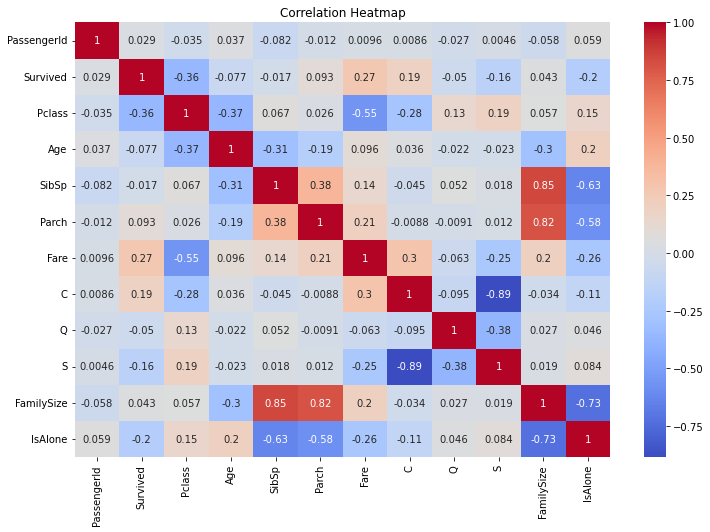

In [131]:
#12a
plt.figure(figsize=(12, 8))  # width=12, height=8 in inches
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#12b

**Positive correlaion with Fare**

**Negative correlaion with Age**